MNIST


In [1]:
# %reset
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [3]:
from display_network import *

In [31]:
mndata = MNIST('./asset/MNIST/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


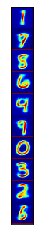

In [38]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
#plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
#image = cmap(norm(A))

import scipy.misc
#scipy.misc.imsave('aa.png', image)

In [39]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [42]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors= N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

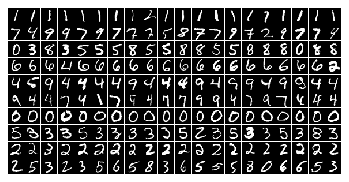

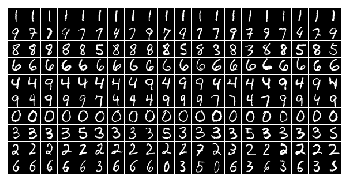

In [47]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()
# import scipy.misc
# scipy.misc.imsave('bb.png', A)


plt.axis('off')
A = display_network(X1.T, 10, N0)
# scipy.misc.imsave('cc.png', A)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()

plt.show()

Segementation and Compression

In [49]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
img = mpimg.imread('girl3.jpg')
plt.imshow(img)
